In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.optimize as optimize
import scipy.special as special

In [2]:
d_rates = pd.read_csv('../data/D_rates.csv')
growth_params = pd.read_csv('../data/fitted_growth_parameters.csv')

In [3]:
filtered_d_rates = d_rates.dropna().to_numpy()[:,1]
filtered_d_rates = filtered_d_rates[filtered_d_rates > 0]
filtered_growth_rates = growth_params["max_growth_rate"].dropna().to_numpy()

In [56]:
gamma_fn = lambda x,theta,k: x**(k-1)*np.exp(-theta*x) / special.gamma(k) / theta**k
gaussian_fn = lambda x,mu,sigma: 1/np.sqrt(2*np.pi*sigma**2)*np.exp(-(x-mu)**2/2/sigma**2)  
gamma_ccdf_fn = lambda x,theta,k: 98*special.gammaincc(k,theta*x)

lognormal_fn = lambda x,mu,sigma: 1/x/np.sqrt(2*np.pi*sigma**2)*np.exp(-(np.log(x)-mu)**2/2/sigma**2)

In [63]:
d_bins = np.geomspace(filtered_d_rates.min(), filtered_d_rates.max(), 20)
d_hist,d_edges = np.histogram(filtered_d_rates, bins=d_bins,density=True)

growth_bins = np.geomspace(filtered_growth_rates.min(), filtered_growth_rates.max(), 20)
growth_hist,growth_edges = np.histogram(filtered_growth_rates, bins=growth_bins,density=True)

growth_ccdf = 1 - np.cumsum(growth_hist)


In [64]:
# growth_ccdf_gamma_fit = optimize.curve_fit(gamma_ccdf_fn, (growth_edges[:-1]+growth_edges[1:])/2, growth_ccdf, p0=[1,1])
growth_gamma_fit = optimize.curve_fit(gamma_fn, (growth_edges[:-1]+growth_edges[1:])/2, growth_hist, p0=[1,1])
growth_lognormal_fit = optimize.curve_fit(lognormal_fn, (growth_edges[:-1]+growth_edges[1:])/2, growth_hist, p0=[1,1])
# d_gamma_fit = optimize.curve_fit(gamma_fn, (growth_edges[:-1]+growth_edges[1:])/2, d_hist, p0=[1,1])
d_lognormal_fit = optimize.curve_fit(lognormal_fn, (growth_edges[:-1]+growth_edges[1:])/2, d_hist, p0=[1,1])

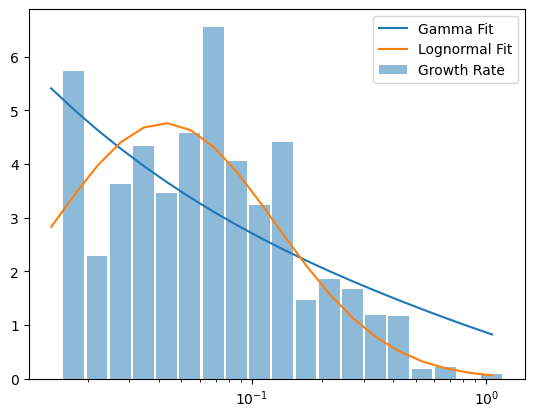

In [65]:
plt.bar((growth_edges[:-1]+growth_edges[1:])/2, growth_hist, width=np.diff(growth_edges), align='edge', alpha=0.5, label='Growth Rate')
plt.plot(growth_edges, gamma_fn(growth_edges, *growth_gamma_fit[0]), label='Gamma Fit')
plt.plot(growth_edges, lognormal_fn(growth_edges, *growth_lognormal_fit[0]), label='Lognormal Fit')
plt.xscale('log')
plt.legend()

plt.show()

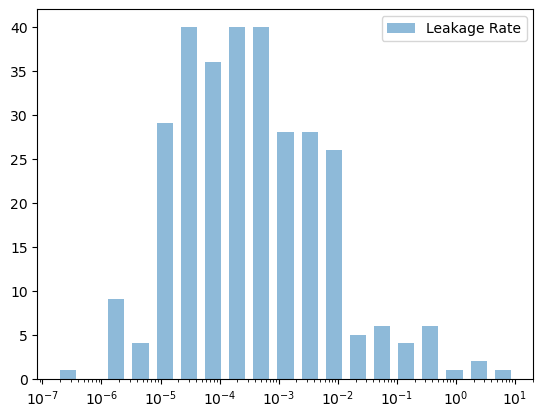

In [40]:
plt.bar((d_edges[:-1]+d_edges[1:])/2, d_hist, width=np.diff(d_edges), align='edge', alpha=0.5, label='Leakage Rate')
# plt.plot(d_edges, lognormal_fn(d_edges, *d_lognormal_fit[0]), label='Lognormal Fit')
plt.xscale('log')
plt.legend()

plt.show()